In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
#import celltypist
#from celltypist import models

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [ ]:
#%pip install celltypist scvi-tools hyperopt "ray[tune]" anndata2ri

In [3]:
models.get_all_models()

['Pan_Fetal_Human.pkl',
 'Human_PF_Lung.pkl',
 'Healthy_COVID19_PBMC.pkl',
 'Developing_Human_Organs.pkl',
 'Mouse_Dentate_Gyrus.pkl',
 'Cells_Lung_Airway.pkl',
 'Cells_Fetal_Lung.pkl',
 'Adult_Human_Skin.pkl',
 'Adult_RhesusMacaque_Hippocampus.pkl',
 'Adult_Human_PancreaticIslet.pkl',
 'Fetal_Human_Pancreas.pkl',
 'Human_Longitudinal_Hippocampus.pkl',
 'Developing_Human_Hippocampus.pkl',
 'Adult_Pig_Hippocampus.pkl',
 'Mouse_Postnatal_DentateGyrus.pkl',
 'Cells_Adult_Breast.pkl',
 'Human_Colorectal_Cancer.pkl',
 'Human_Placenta_Decidua.pkl',
 'Fetal_Human_Pituitary.pkl',
 'Adult_Human_Vascular.pkl',
 'Fetal_Human_AdrenalGlands.pkl',
 'Nuclei_Lung_Airway.pkl',
 'Human_Endometrium_Atlas.pkl',
 'Developing_Human_Brain.pkl',
 'Fetal_Human_Retina.pkl',
 'Human_IPF_Lung.pkl',
 'Adult_COVID19_PBMC.pkl',
 'Healthy_Adult_Heart.pkl',
 'Human_Lung_Atlas.pkl',
 'Mouse_Whole_Brain.pkl',
 'Adult_Mouse_OlfactoryBulb.pkl',
 'COVID19_HumanChallenge_Blood.pkl',
 'Human_Embryonic_YolkSac.pkl',
 'Human_D

In [4]:
model_low = models.Model.load(model='Human_Colorectal_Cancer.pkl')

In [5]:
def predict_cells(adata):
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.normalize_total(adata, target_sum=1e4) #not recommended for typical pp
    sc.pp.log1p(adata)

    adata.X = adata.X.toarray()

    predictions = celltypist.annotate(adata, model=model_low, majority_voting=False)
    predictions_adata = predictions.to_adata()
    adata.obs["low_label"] = predictions_adata.obs.loc[adata.obs.index, "predicted_labels"]
    adata.obs["low_score"] = predictions_adata.obs.loc[adata.obs.index, "conf_score"]


    return adata.obs

In [6]:
adatas = [sc.read_h5ad('pp_adata/' + x) for x in os.listdir('pp_adata')]

In [8]:
len(adatas)

6

In [9]:
predictions = [predict_cells(ad.copy()) for ad in adatas] #we pass a copy so it doesnt normalize the counts

🔬 Input data has 3197 cells and 15131 genes
🔗 Matching reference genes in the model
🧬 4037 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 2918 cells and 13405 genes
🔗 Matching reference genes in the model
🧬 3624 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 2256 cells and 15734 genes
🔗 Matching reference genes in the model
🧬 4069 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 4392 cells and 15221 genes
🔗 Matching reference genes in the model
🧬 3998 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 4036 cells and 14335 genes
🔗 Matching reference genes in the model
🧬 3816 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 2988 cells and 15372 genes
🔗 Matching reference genes in the model
🧬 3997

In [10]:
predictions = pd.concat(predictions)[['low_label', 'low_score',]]

predictions

,low_label,low_score
711_AAACCCAAGTCGGGAT-1,T follicular helper cells,0.103311
711_AAACCCACAGAGGAAA-1,Unknown,0.236022
711_AAACCCACATGATAGA-1,Unknown,0.400460
711_AAACCCAGTCTCGCGA-1,Tip-like ECs,0.966648
711_AAACGAAGTTATCTTC-1,gamma delta T cells,0.993837
...,...,...
706_TTTGGTTCAAACACCT-1,CD8+ T cells,0.999997
706_TTTGGTTCAACGGGTA-1,Pro-inflammatory,0.549964
706_TTTGGTTTCTATCGCC-1,Stromal 2,0.961222
706_TTTGTTGCATCAGCGC-1,CMS2,0.978673


In [12]:
adata = sc.concat(adatas)
adata

AnnData object with n_obs × n_vars = 19787 × 33694
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'doublet_score'

In [13]:
#predictions.to_csv('PREDICTIONS.csv')

In [14]:
adata.obs = adata.obs.merge(right = predictions, left_index=True, right_index=True)

In [19]:
adata

AnnData object with n_obs × n_vars = 19787 × 33694
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'doublet_score', 'low_label', 'low_score'

In [20]:
adata.obs

,samples,condition,location,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,doublet,doublet_score,low_label,low_score
711_AAACCCAAGTCGGGAT-1,711,Tumor,Right,707,707,6.562444,1396.0,7.242083,26.862464,10.100286,25.716331,0.000000,0.0,3.002337e-04,T follicular helper cells,0.103311
711_AAACCCACAGAGGAAA-1,711,Tumor,Right,838,838,6.732211,1504.0,7.316548,23.803191,9.441490,13.962767,0.000000,0.0,1.189634e-03,Unknown,0.236022
711_AAACCCACATGATAGA-1,711,Tumor,Right,435,435,6.077642,613.0,6.419995,17.781403,0.815661,18.270800,0.000000,0.0,1.420739e-06,Unknown,0.400460
711_AAACCCAGTCTCGCGA-1,711,Tumor,Right,579,579,6.363028,860.0,6.758094,23.255814,15.465117,6.395349,0.000000,0.0,4.835109e+00,Tip-like ECs,0.966648
711_AAACGAAGTTATCTTC-1,711,Tumor,Right,1384,1384,7.233455,2629.0,7.874739,19.246862,8.178015,15.405098,0.000000,0.0,1.557169e+00,gamma delta T cells,0.993837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706_TTTGGTTCAAACACCT-1,706,Tumor,Left,1815,1815,7.504392,4944.0,8.506132,21.318770,1.961974,21.318771,0.020227,0.0,6.995425e-01,CD8+ T cells,0.999997
706_TTTGGTTCAACGGGTA-1,706,Tumor,Left,909,909,6.813445,3528.0,8.168770,34.722222,0.368481,25.368483,0.000000,0.0,3.442482e-02,Pro-inflammatory,0.549964
706_TTTGGTTTCTATCGCC-1,706,Tumor,Left,4658,4658,8.446556,23600.0,10.069044,17.559322,3.237288,18.135593,0.004237,0.0,5.873064e+00,Stromal 2,0.961222
706_TTTGTTGCATCAGCGC-1,706,Tumor,Left,374,374,5.926926,686.0,6.532334,23.032070,10.932944,33.236153,0.000000,0.0,6.101866e-08,CMS2,0.978673


In [17]:
#adata.write_h5ad('unintigrated.h5ad')

In [3]:
from scvi.autotune import ModelTuner
from ray import tune

In [4]:
adata = sc.read('unintigrated.h5ad')
adata

AnnData object with n_obs × n_vars = 19787 × 33694
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'doublet_score', 'low_label', 'low_score'

In [9]:
#pip install --user scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 407.6 kB/s eta 0:00:001m400.0 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
sc.pp.highly_variable_genes(adata, n_top_genes = 3000, subset = True, flavor = 'seurat_v3')
adata

AnnData object with n_obs × n_vars = 19787 × 3000
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'doublet_score', 'low_label', 'low_score'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [7]:
sc.pp.filter_genes(adata, min_cells = 50)
adata

AnnData object with n_obs × n_vars = 19787 × 2511
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'doublet_score', 'low_label', 'low_score'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'n_cells'
    uns: 'hvg'

In [8]:
model_cls = scvi.model.SCVI
model_cls.setup_anndata(adata, categorical_covariate_keys = ['samples'],
                             continuous_covariate_keys=['pct_counts_mt', 'pct_counts_ribo'])

tuner = ModelTuner(model_cls)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [9]:
search_space = {
    "n_hidden": tune.choice([92, 128, 192, 256]),
    "n_latent": tune.choice([10, 20, 30, 40, 50, 60]),
    "n_layers": tune.choice([1, 2, 3]),
    "lr": tune.loguniform(1e-4, 1e-2),
    "gene_likelihood": tune.choice(["nb", "zinb"])}

In [ ]:
results = tuner.fit(adata, metric="validation_loss",
                    resources = {'gpu': 1}, #have to specify gpu or might not use
                    search_space = search_space,
                   num_samples = 70,
                   max_epochs = 20)

In [11]:
best_vl = 10000
best_i = 0
for i, res in enumerate(results.results):
    vl = res.metrics['validation_loss']

    if vl < best_vl:
        best_vl = vl
        best_i = i

In [12]:
best_i

25

In [13]:
results.results[best_i]

Result(
  metrics={'validation_loss': 478.3707275390625},
  path='/home/sapien/Desktop/scdata/raw_adata/modified_data/scvi_log/autotune/2025-06-24_21-18-20_scvi/_trainable_c4f4b055_26_gene_likelihood=zinb,lr=0.0020,n_hidden=256,n_latent=30,n_layers=2_2025-06-24_21-23-09',
  filesystem='local',
  checkpoint=None
)

In [14]:
scvi.model.SCVI.setup_anndata(adata,
                              categorical_covariate_keys = ['samples'],
                             continuous_covariate_keys=['pct_counts_mt', 'pct_counts_ribo'])

In [15]:
model = scvi.model.SCVI(adata, n_hidden = 256, n_latent = 30, n_layers = 2, gene_likelihood = 'zinb')

In [16]:
kwargs = {'lr': 0.0020}

In [17]:
model.train(max_epochs = 150, early_stopping = True, plan_kwargs = kwargs)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 150/150: 100%|█| 150/150 [03:38<00:00,  1.53s/it, v_num=1, train_loss_step=397

`Trainer.fit` stopped: `max_epochs=150` reached.


Epoch 150/150: 100%|█| 150/150 [03:38<00:00,  1.46s/it, v_num=1, train_loss_step=397


In [18]:
model.save('the_model')

In [ ]:
model = scvi.model.SCVI.load('the_model/', adata)

In [19]:
y = model.history['reconstruction_loss_validation']['reconstruction_loss_validation'].min()

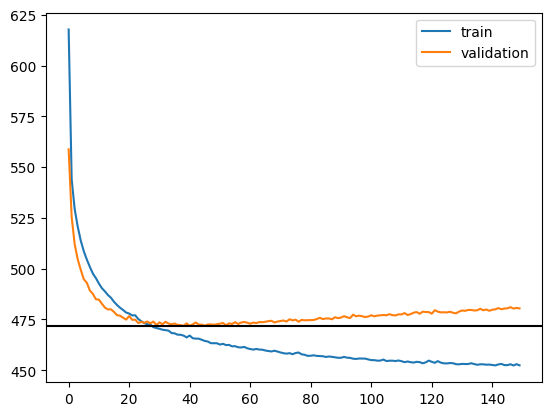

In [20]:
plt.plot(model.history['reconstruction_loss_train']['reconstruction_loss_train'], label='train')
plt.plot(model.history['reconstruction_loss_validation']['reconstruction_loss_validation'], label='validation')

plt.axhline(y, c = 'k')

plt.legend()
plt.show()

In [21]:
adata.write_h5ad('temp.h5ad')

In [34]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [35]:
adata.obsm['X_scVI'].shape

(19787, 30)

In [38]:
sc.pp.neighbors(adata, use_rep='X_scVI', n_pcs=None)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'print': Cannot determine Numba type of <class 'function'>

File "../../../../anaconda3/envs/scCRC/lib/python3.9/site-packages/pynndescent/pynndescent_.py", line 253:
def nn_descent_internal_low_memory_parallel(
    <source elided>
        if verbose:
            print("\t", n + 1, " / ", n_iters)
            ^

During: resolving callee type: type(CPUDispatcher(<function nn_descent_internal_low_memory_parallel at 0x7221b8747280>))
During: typing of call at /home/sapien/anaconda3/envs/scCRC/lib/python3.9/site-packages/pynndescent/pynndescent_.py (359)

During: resolving callee type: type(CPUDispatcher(<function nn_descent_internal_low_memory_parallel at 0x7221b8747280>))
During: typing of call at /home/sapien/anaconda3/envs/scCRC/lib/python3.9/site-packages/pynndescent/pynndescent_.py (359)


File "../../../../anaconda3/envs/scCRC/lib/python3.9/site-packages/pynndescent/pynndescent_.py", line 359:
def nn_descent(
    <source elided>
    if low_memory:
        nn_descent_internal_low_memory_parallel(
        ^


In [39]:
adata.obsm['X_scVI']

array([[-0.6350593 , -0.01137188, -0.25571877, ..., -1.4056249 ,
         0.01762414,  0.12817264],
       [-0.3308946 ,  0.00410016, -0.5895355 , ..., -1.072785  ,
        -0.09313279, -0.12664056],
       [-1.0084183 , -0.02707837,  1.4889886 , ..., -1.1060004 ,
        -0.4999826 ,  1.2439009 ],
       ...,
       [ 3.008141  , -0.04036414,  1.8433666 , ..., -0.73936737,
        -0.3493724 , -0.13094378],
       [ 0.44079408, -0.02526012,  1.192378  , ..., -0.77835596,
        -0.8106265 ,  1.0722873 ],
       [-1.5180562 , -0.02508676,  1.1226594 , ...,  0.4137543 ,
        -0.74975586,  0.47002938]], dtype=float32)